In [2]:
import numpy as np
import matplotlib.pyplot as plt

# MAC0460/5832 - Lista 3: Redes Neurais - MNIST

### Data de Entrega: 23h55m do dia 23/06/2017

##### Classificação de dígitos
Os dataset para esta tarefa foi tirado da competição do kaggle de reconhecimento de dígitos (https://www.kaggle.com/c/digit-recognizer) e está disponível em http://vision.ime.usp.br/~caiomr/mac0460_5832/train.csv.gz. O dataset está sob a licença Creative Commons Attribution-Share Alike 3.0 license (https://creativecommons.org/licenses/by-sa/3.0/). O dataset foi zipado, mas os dados estão inalterados. Cada linha (amostra) do arquivo contém 785 colunas: a primeira informa o label da amostra e as outras 784 são os valores dos pixels da imagem (28 x 28) que representa o dígito.

Q1. Projete uma rede neural para resolver o problema de classificação de dígitos. Baixe o arquivo train.csv.gz (link acima) e dezipe-o para a pasta data/. Verifique que as células abaixo executam com sucesso e exibem o resultado esperado. Utilize os pacotes de python tensorflow (https://www.tensorflow.org/) ou theano (http://deeplearning.net/software/theano/) para implementar sua rede neural. Escolha o que preferir/tiver mais familiaridade - ou o quiser passar a ter mais familiaridade :) - para definir sua rede neural. Usem a arquitetura 3-layer NN 300+100 hidden units (erro 3.05%), como descrito no site http://yann.lecun.com/exdb/mnist/index.html.


Façam os três seguintes experimentos:

1. Imagem original.
2. Imagem amostrada com passo 1, isto é, reduz a imagem para 1/4 do número total de pixels.
3. Imagem amostrada com passo 2, isto é, reduz a imagem para 1/16 do número total de pixels.


Em cada experimento, execute os seguintes procedimentos:
1. Compute a curva experimental de aprendizado (N = 5000, N = 10000, N = 15000, ... N = 35000), estimar o $E_{out}$ a partir das 7000 amostras não usadas.
2. Para N = 35000 (isto é, separe 7000 amostras para validação), calcule o valor da precisão $\epsilon = E_{out} - E_{in}$.
3. Adote o valor de $\epsilon$ calculado em 2; repita dez vezes o experimento de aprendizado para $N = 35000$ e 7000 amostras de validação (em cada experimento, escolha aleatoriamente entre as 42000 amostras 7000 para formar o conjunto de validação e as restantes para treinamento); calcule o $E_{out}$ para cada um dos experimentos; a partir dos $E_{out}$ calculados, estime o valor do parâmetro $\delta$.
4. Comente os resultados obtidos.

Adote *learning rate* $\eta = 0.001$.
Para o item 3, lembre da equação $P(|E_{out}(h_{opt}) - E_{in}(h_{opt})| < \epsilon) > 1 - \delta$.

In [3]:
data = np.genfromtxt('data/train.csv', delimiter=',', skip_header=1).astype(np.dtype('uint8'))
print(data.shape)

(42000, 785)


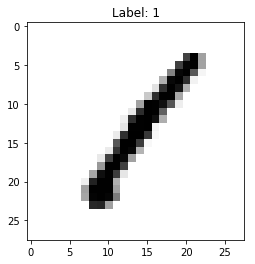

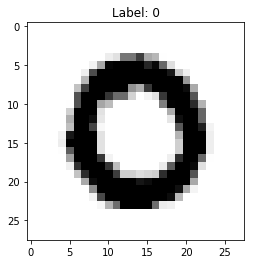

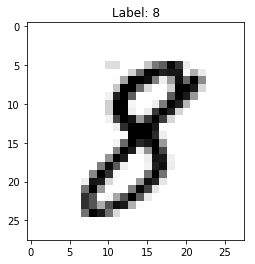

In [5]:
def display_example(sample):
    label = sample[0]
    image = sample[1:].reshape((28,28))
    plt.title('Label: %d' % (label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

# sample = data[0]
# print("Label: ", sample[0])
# plt.imshow(sample[1:].reshape((28,28)), cmap='gray')
# plt.show()

display_example(data[0])
display_example(data[1])
display_example(data[20])


Q2. O método de aprendizado adotado na questão anterior inclui regularização? Caso afirmativo, como? Caso negativo, como formularia a inclusão da regularização e porque esse procedimento melhoraria o resultado?